In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL=r"/content/SpotifyFeatures.csv"
data=pd.read_csv(URL)

In [3]:
print(data)
print(data.info())

       genre        artist_name                              track_name  \
0      Movie     Henri Salvador             C'est beau de faire un Show   
1      Movie  Martin & les fées        Perdu d'avance (par Gad Elmaleh)   
2      Movie    Joseph Williams          Don't Let Me Be Lonely Tonight   
3      Movie     Henri Salvador          Dis-moi Monsieur Gordon Cooper   
4      Movie       Fabien Nataf                               Ouverture   
...      ...                ...                                     ...   
14579  Dance         Katy Perry                   The One That Got Away   
14580  Dance         Hey Violet                                  Hoodie   
14581  Dance     Jennifer Lopez                                  Dinero   
14582  Dance         Bruno Mars                            Runaway Baby   
14583  Dance  Justin Timberlake  CAN'T STOP THE FEELING! - Film Version   

                     track_id  popularity  acousticness  danceability  \
0      0BRjO6ga9RKCKjfDqeF

In [4]:
features=data.drop(columns=['genre','artist_name','track_name','track_id','key','mode','time_signature']).copy()

In [5]:
features

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.611000,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,1,0.246000,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,3,0.952000,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,0,0.703000,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,4,0.950000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...
14579,70,0.000802,0.687,227333,0.792,0.000000,0.2000,-4.023,0.0353,133.962,0.864
14580,68,0.012600,0.688,219183,0.699,0.000006,0.3910,-5.000,0.0445,94.935,0.385
14581,70,0.410000,0.721,213750,0.881,0.000008,0.2920,-2.528,0.3420,127.759,0.643
14582,63,0.250000,0.656,147747,0.767,0.000000,0.1140,-3.038,0.0396,163.834,0.871


In [11]:

features=features.dropna()
print(features.isnull().sum())


popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64


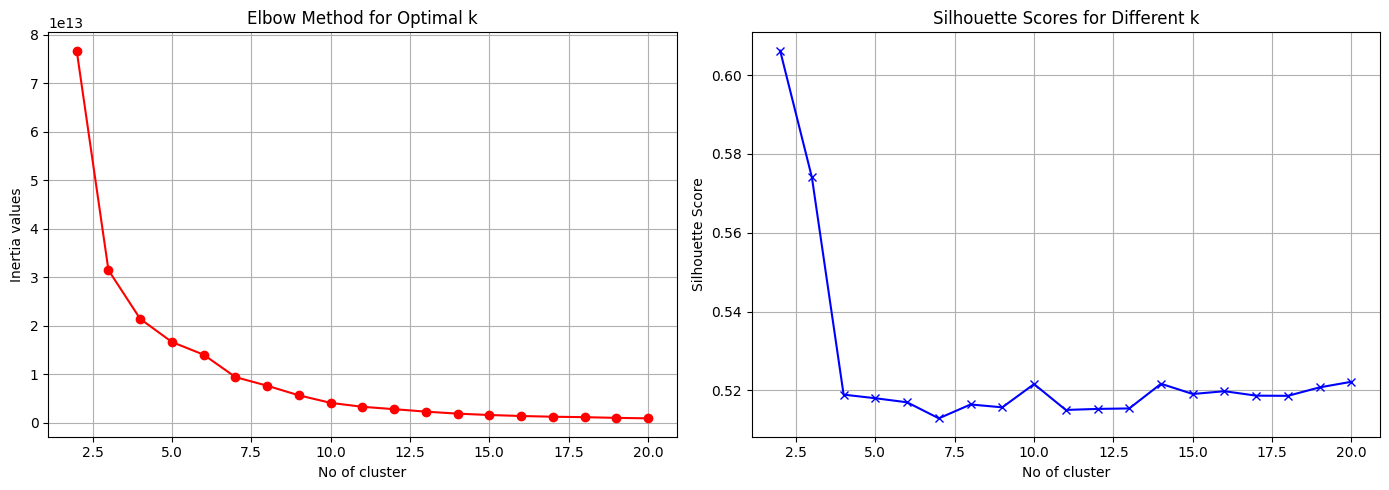

In [12]:
inertia_values=[]
silhouette_scores_list=[]
k_range=range(2,21)
for k in k_range:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(features)
    inertia_values.append(model.inertia_)
    silhouette_scores_list.append(silhouette_score(features,model.labels_))
fig,axs=plt.subplots(1,2,figsize=(14,5))
axs[0].plot(k_range,inertia_values,marker='o',color='red')
axs[0].set_xlabel("No of cluster")
axs[0].set_ylabel("Inertia values")
axs[0].set_title("Elbow Method for Optimal k")
axs[0].grid(True)

axs[1].plot(k_range,silhouette_scores_list,marker='x',color='blue')
axs[1].set_xlabel("No of cluster")
axs[1].set_ylabel("Silhouette Score")
axs[1].set_title("Silhouette Scores for Different k")
axs[1].grid(True)
plt.tight_layout()
plt.show()





In [34]:
songs=data.drop(columns=['genre','track_id','key','mode','time_signature']).copy()
songs=songs[:-1]

In [35]:
optimal_k=5
k_model=KMeans(n_clusters=optimal_k,random_state=42)
k_model.fit(features)
songs['clusters']=k_model.predict(features)



In [36]:
songs

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,clusters
0,Henri Salvador,C'est beau de faire un Show,0,0.611000,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,1
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246000,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,1
2,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952000,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,1
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703000,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,1
4,Fabien Nataf,Ouverture,4,0.950000,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14578,Ginuwine,Differences,70,0.318000,0.562,265533,0.594,0.000000,0.3110,-4.578,0.0558,62.876,0.423,0
14579,Katy Perry,The One That Got Away,70,0.000802,0.687,227333,0.792,0.000000,0.2000,-4.023,0.0353,133.962,0.864,0
14580,Hey Violet,Hoodie,68,0.012600,0.688,219183,0.699,0.000006,0.3910,-5.000,0.0445,94.935,0.385,0
14581,Jennifer Lopez,Dinero,70,0.410000,0.721,213750,0.881,0.000008,0.2920,-2.528,0.3420,127.759,0.643,1


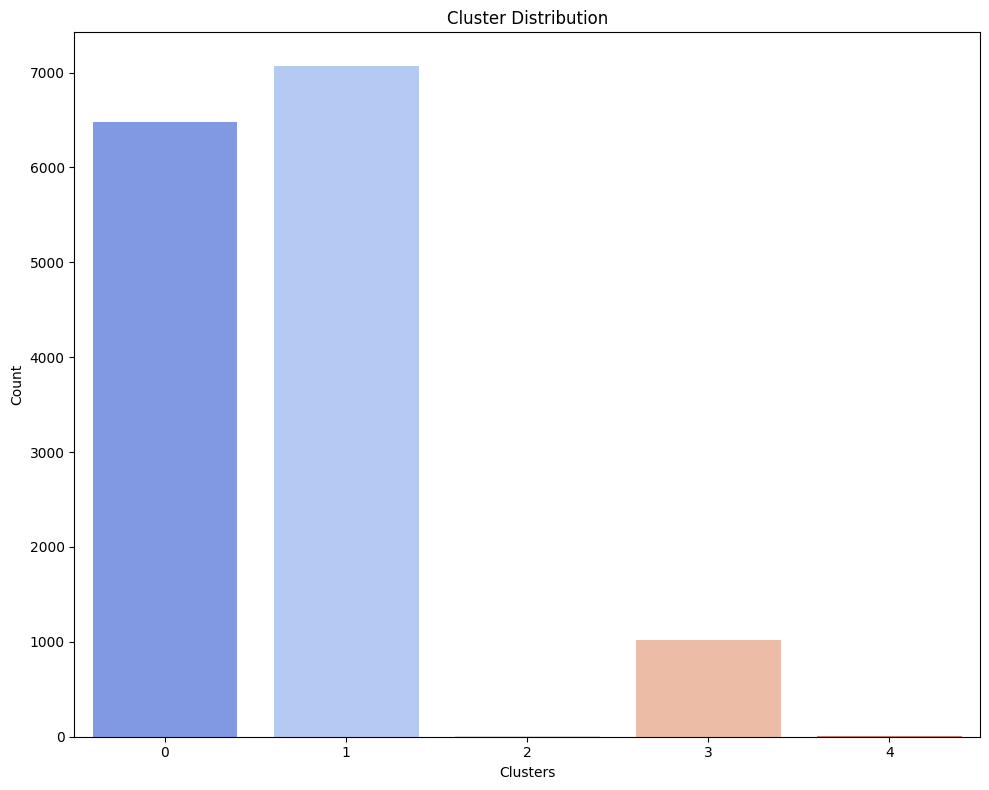

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x=songs['clusters'],palette='coolwarm')
plt.title("Cluster Distribution")
plt.xlabel("Clusters")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [41]:
def song_recommender(song_name,n):
  target=songs[songs['track_name'].str.lower()==song_name.lower()]
  if target.empty:
    return f'{song_name} not found!'
  cluster_id=target['clusters'].values[0]
  recommend_songs=songs[(songs['clusters']==cluster_id) & (songs['track_name']!=song_name)]
  return recommend_songs[['artist_name','track_name','popularity']].sort_values(by=['popularity'],ascending=False).head(n).reset_index(drop=True)
song_name=input("Enter the song you like: ")
song_recommender(song_name,5)


Enter the song you like: The One That Got Away


,artist_name,track_name,popularity
0,Calvin Harris,Giant (with Rag'n'Bone Man),94
1,Mark Ronson,Nothing Breaks Like a Heart (feat. Miley Cyrus),92
2,Ariana Grande,bad idea,91
3,The Chainsmokers,Who Do You Love (with 5 Seconds of Summer),91
4,Camila Cabello,Havana,88
